                                                            # ANÁLISIS DE DATOS 
                                              Tarea 3: Algoritmos de Aprendizaje Supervisado


                                                                 Estudiante:
                                                            Bernardo Mejía Jiménez

                                                               Grupo: 202337121_8


#### Paso 1: Cargar y explorar los datos

In [1]:
# importar libreria
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_selection import RFE

In [2]:
# Cargar datos
datos = pd.read_csv('./heart_cleveland_upload.csv')

In [4]:
# Renombrar columnas para mayor claridad si se llega al caso
datos.columns = ['Edad', 'Sexo', 'Dolor_torácico', 'Presión_arterial', 'Colesterol_mg/dl', 'Azúcar_sangre', 
              'Electrocardiográficos', 'Frecuencia_cardíaca', 'Angina_inducida', 'Depresión', 'Pendiente', 
              'Número_vasos', 'Defecto', 'Conditión']

####  2. Análisis exploratorio de datos (EDA)

In [6]:
print(datos.head())

   Edad  Sexo  Dolor_torácico  Presión_arterial  Colesterol_mg/dl  \
0    69     1               0               160               234   
1    69     0               0               140               239   
2    66     0               0               150               226   
3    65     1               0               138               282   
4    64     1               0               110               211   

   Azúcar_sangre  Electrocardiográficos  Frecuencia_cardíaca  Angina_inducida  \
0              1                      2                  131                0   
1              0                      0                  151                0   
2              0                      0                  114                0   
3              1                      2                  174                0   
4              0                      2                  144                1   

   Depresión  Pendiente  Número_vasos  Defecto  Conditión  
0          1          1             1 

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Edad                   297 non-null    int64
 1   Sexo                   297 non-null    int64
 2   Dolor_torácico         297 non-null    int64
 3   Presión_arterial       297 non-null    int64
 4   Colesterol_mg/dl       297 non-null    int64
 5   Azúcar_sangre          297 non-null    int64
 6   Electrocardiográficos  297 non-null    int64
 7   Frecuencia_cardíaca    297 non-null    int64
 8   Angina_inducida        297 non-null    int64
 9   Depresión              297 non-null    int64
 10  Pendiente              297 non-null    int64
 11  Número_vasos           297 non-null    int64
 12  Defecto                297 non-null    int64
 13  Conditión              297 non-null    int64
dtypes: int64(14)
memory usage: 32.6 KB


In [8]:
print(datos.describe())

             Edad        Sexo  Dolor_torácico  Presión_arterial  \
count  297.000000  297.000000      297.000000        297.000000   
mean    54.542088    0.676768        2.158249        131.693603   
std      9.049736    0.468500        0.964859         17.762806   
min     29.000000    0.000000        0.000000         94.000000   
25%     48.000000    0.000000        2.000000        120.000000   
50%     56.000000    1.000000        2.000000        130.000000   
75%     61.000000    1.000000        3.000000        140.000000   
max     77.000000    1.000000        3.000000        200.000000   

       Colesterol_mg/dl  Azúcar_sangre  Electrocardiográficos  \
count        297.000000     297.000000             297.000000   
mean         247.350168       0.144781               0.996633   
std           51.997583       0.352474               0.994914   
min          126.000000       0.000000               0.000000   
25%          211.000000       0.000000               0.000000   
50%   

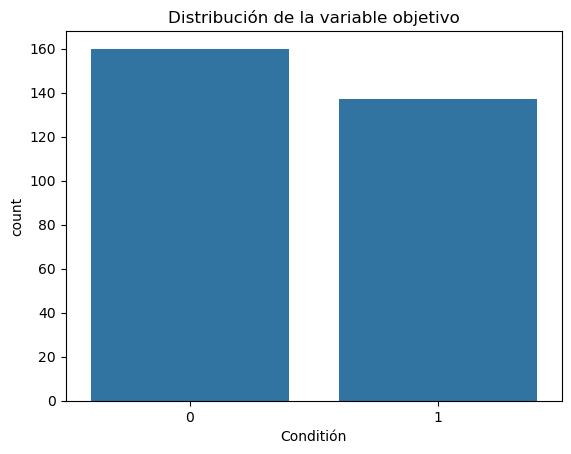

In [10]:
# Distribución de la variable objetivo
sns.countplot(x='Conditión', data=datos)
plt.title('Distribución de la variable objetivo')
plt.show()

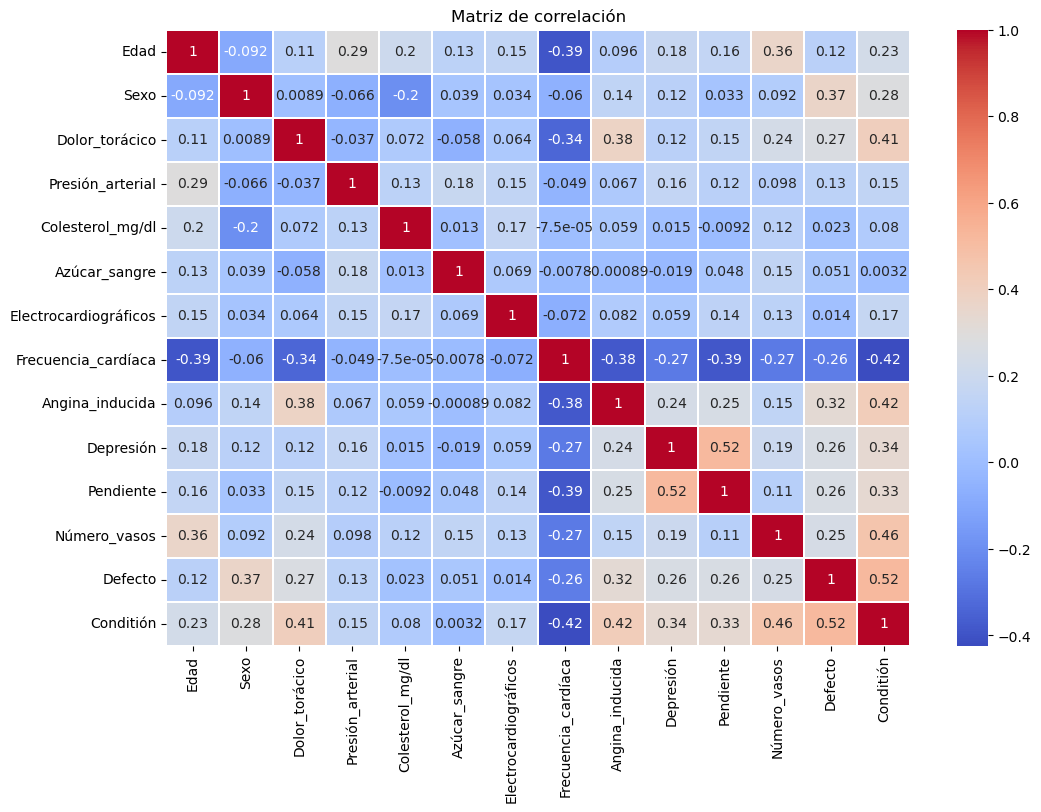

In [12]:
# Matriz de correlación
corr_matrix = datos.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Matriz de correlación')
plt.show()

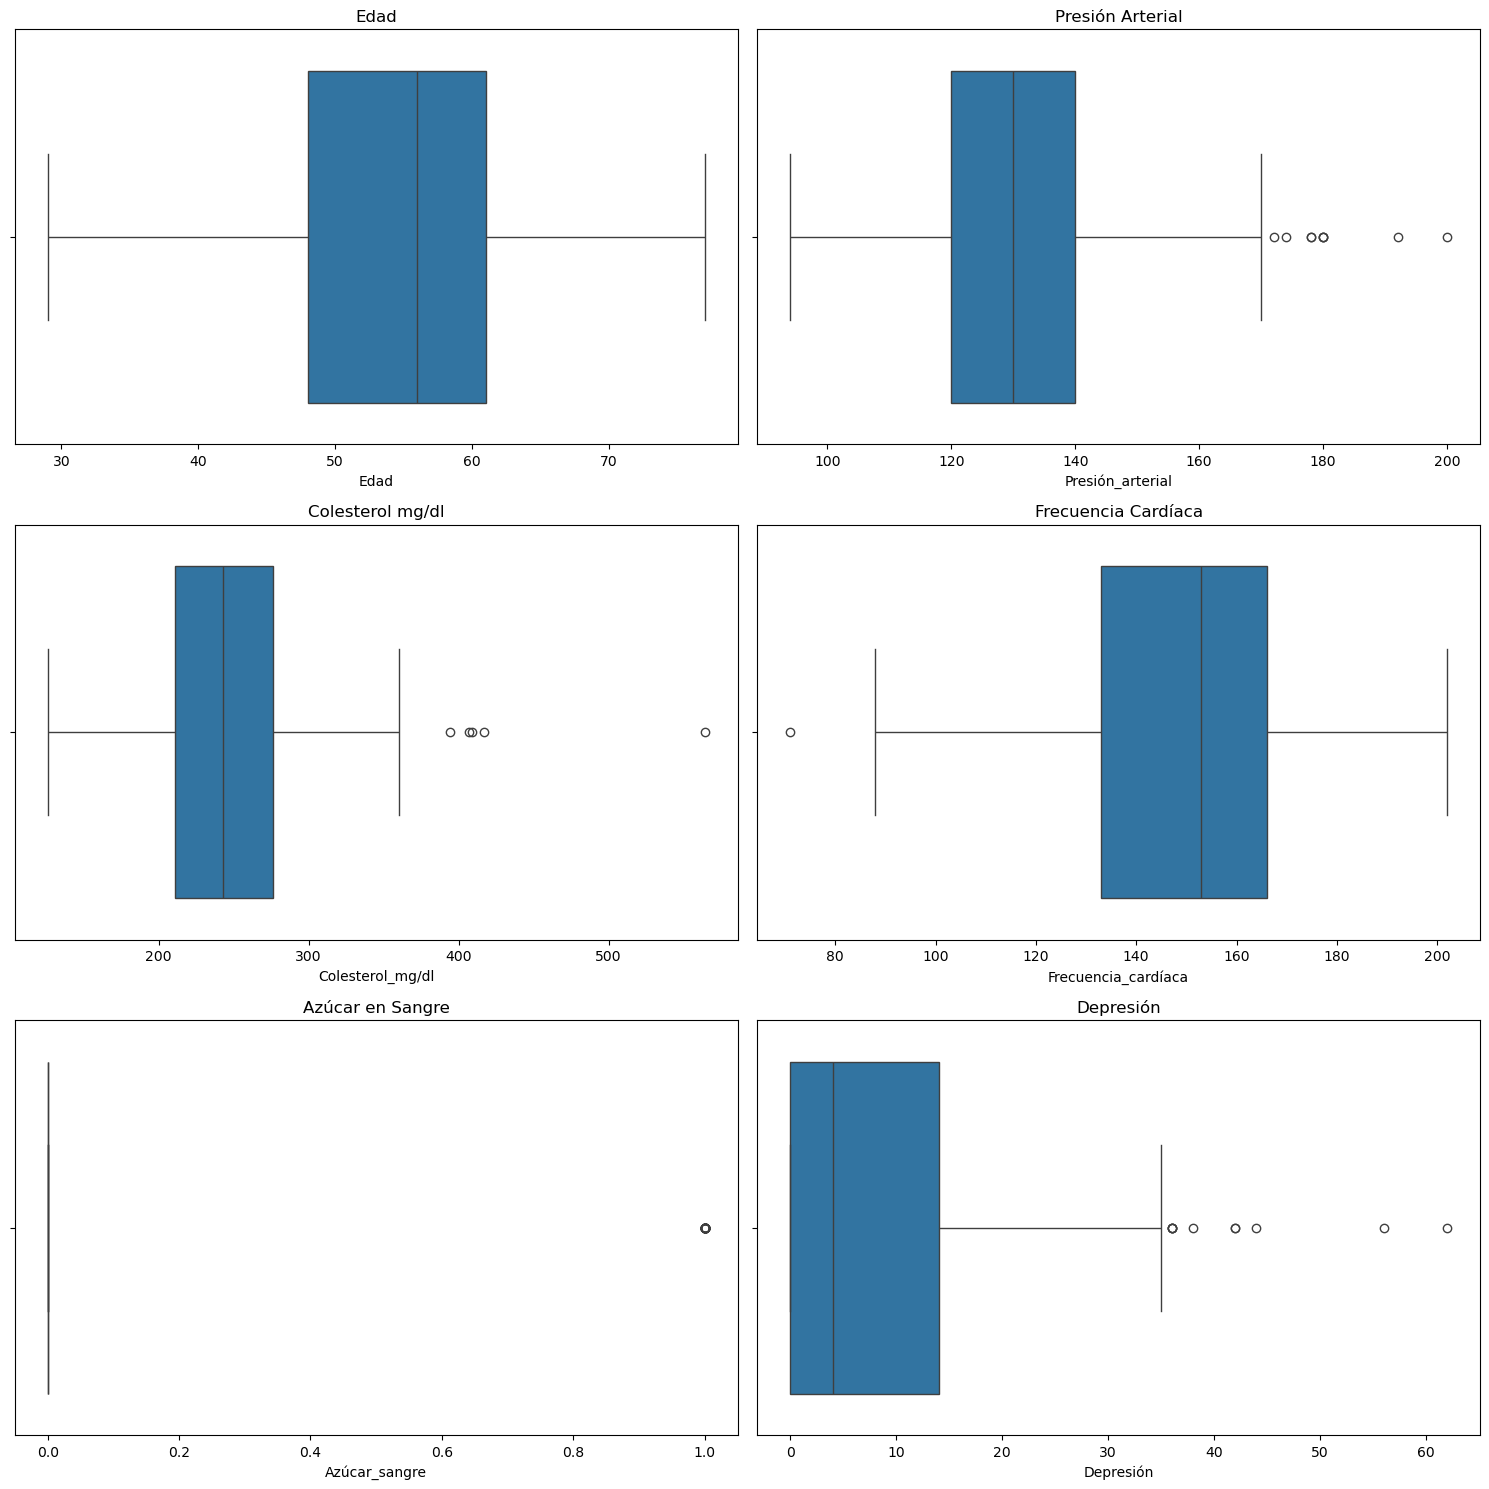

In [13]:
# Boxplots para identificar valores atípicos
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.boxplot(ax=axes[0, 0], x=datos['Edad']).set_title("Edad")
sns.boxplot(ax=axes[0, 1], x=datos['Presión_arterial']).set_title("Presión Arterial")
sns.boxplot(ax=axes[1, 0], x=datos['Colesterol_mg/dl']).set_title("Colesterol mg/dl")
sns.boxplot(ax=axes[1, 1], x=datos['Frecuencia_cardíaca']).set_title("Frecuencia Cardíaca")
sns.boxplot(ax=axes[2, 0], x=datos['Azúcar_sangre']).set_title("Azúcar en Sangre")
sns.boxplot(ax=axes[2, 1], x=datos['Depresión']).set_title("Depresión")
plt.tight_layout()
plt.show()

### 3. Preprocesamiento de datos

In [14]:
# Verificar y tratar valores faltantes
print(datos.isnull().sum())

Edad                     0
Sexo                     0
Dolor_torácico           0
Presión_arterial         0
Colesterol_mg/dl         0
Azúcar_sangre            0
Electrocardiográficos    0
Frecuencia_cardíaca      0
Angina_inducida          0
Depresión                0
Pendiente                0
Número_vasos             0
Defecto                  0
Conditión                0
dtype: int64


In [15]:
# Eliminar filas con valores nulos (si hubiera)
datos.dropna(inplace=True)

In [16]:
# Verificar valores únicos en cada columna para identificar posibles errores
for column in datos.columns:
    print(f'{column}: {datos[column].unique()}')

Edad: [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
Sexo: [1 0]
Dolor_torácico: [0 1 2 3]
Presión_arterial: [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
Colesterol_mg/dl: [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 1

### 4. Selección de características

In [17]:
X = datos.drop('Conditión', axis=1)
y = datos['Conditión']

In [20]:
# Usar RFE para seleccionar las características más relevantes
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)
selected_features = X.columns[fit.support_]
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['Azúcar_sangre', 'Angina_inducida', 'Pendiente', 'Número_vasos',
       'Defecto'],
      dtype='object')


In [21]:
# Reducir el dataset a las características seleccionadas
X = X[selected_features]

#### 5. División del dataset en conjuntos de entrenamiento y prueba

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### 6. Entrenamiento del modelo

In [27]:
# Ajuste de hiperparámetros con GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']})

In [28]:
# Mejor modelo
best_model = grid.best_estimator_
print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 10, 'solver': 'lbfgs'}


#### 7. Evaluación del modelo

In [29]:
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        34
           1       0.85      0.83      0.84        41

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



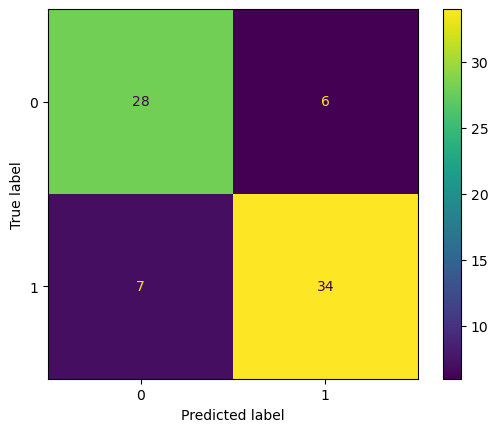

In [30]:
# Matriz de confusión
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

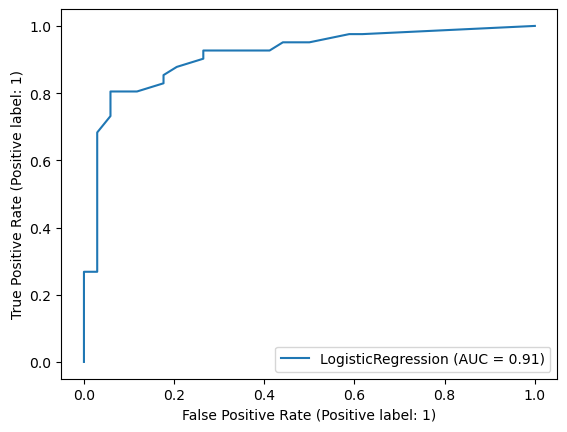

In [31]:
# Curva ROC
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

#### 8. Interpretación y documentación de resultados


El presente informe detalla el análisis exploratorio de datos realizado sobre el dataset heart_cleveland_upload.csv. Este conjunto de datos contiene información médica de pacientes y tiene como objetivo predecir la presencia de enfermedades cardíacas.

Descripción General del Dataset
El dataset contiene 14 columnas que representan diferentes características médicas de los pacientes. Estas características incluyen edad, sexo, presión arterial, colesterol, entre otras. La columna Conditión es la variable objetivo que indica la presencia o ausencia de enfermedad cardíaca.

Análisis Exploratorio de Datos
Descripción General del Dataset: Se comenzó por revisar las primeras filas y obtener estadísticas descriptivas de las variables numéricas para entender la estructura del dataset.

Distribución de la Variable Objetivo: Se visualizó la distribución de la variable objetivo Conditión para comprender la proporción de clases en el dataset.

Matriz de Correlación: Se generó una matriz de correlación para identificar posibles relaciones entre las variables.

Boxplots para Identificar Valores Atípicos: Se crearon boxplots para identificar posibles valores atípicos en las principales variables numéricas.

Resultados y Conclusiones
El análisis exploratorio reveló que no hay valores nulos en el dataset.
Se observaron algunas variables con valores atípicos, lo cual puede requerir una mayor exploración y posiblemente una limpieza de datos.
La matriz de correlación mostró algunas relaciones entre las variables, lo que sugiere que algunas características podrían ser predictivas de la presencia de enfermedades cardíacas.
La distribución de la variable objetivo indica un desbalance entre las clases, lo que puede requerir técnicas de muestreo estratificado durante la división del dataset para entrenamiento y prueba.
Recomendaciones
Se recomienda realizar un análisis más detallado de las variables con valores atípicos para determinar si deben ser tratadas o eliminadas.
Sería beneficioso explorar técnicas de balanceo de clases para abordar el desbalance en la variable objetivo durante el entrenamiento del modelo.
Es importante considerar técnicas de selección de características para identificar las variables más relevantes para predecir la presencia de enfermedades cardíacas.
Este análisis proporciona una base sólida para continuar con la construcción de modelos predictivos y la implementación de estrategias para mejorar su desempeño.





